In [2]:
#much needed data handeling and visualisation libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [3]:
#import all csv files:
otrain = pd.read_csv("Dataset/train.csv")
otest = pd.read_csv("Dataset/test.csv")
ostructure = pd.read_csv("Dataset/Building_Structure.csv")
oowner = pd.read_csv("Dataset/Building_Ownership_Use.csv")

In [4]:
train=otrain.copy(deep=False)
test=otest.copy(deep=False)
structure=ostructure.copy(deep=False)
owner=oowner.copy(deep=False)

In [5]:
#train.info()

In [6]:
#train.head(3)

In [7]:
#train.describe()

In [8]:
#test.info()

In [9]:
#test.head(3)

In [10]:
#test.describe()

In [11]:
#structure.info()

In [12]:
#structure.head()

In [13]:
#structure.describe()

In [14]:
#owner.info()

In [15]:
#owner.head(3)

In [16]:
#owner.describe()

Different Damages grade are : ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'] 

Below plot concerns about number of buildings affected by different Damage Grade : 


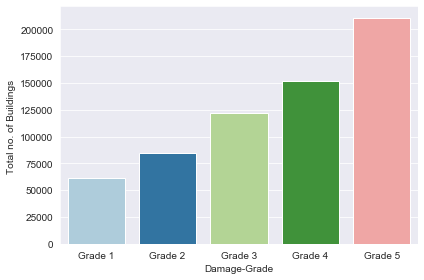

In [17]:
#now going to out target variable which is train.damage_grade
print("Different Damages grade are : {} \n".format(list(train.damage_grade.value_counts().sort_values(ascending=True).index))
     )


#visualising that how many buildings got what kind of damage grade:
print("Below plot concerns about number of buildings affected by different Damage Grade : ")
sns.countplot(train.damage_grade,palette="Paired",order=train.damage_grade.value_counts().sort_values(ascending=True).index)
plt.ylabel("Total no. of Buildings ")
plt.xlabel("Damage-Grade")
plt.tight_layout()

##### Miss U Data:
1.)Before makng any analysis, first we have to go through all datasets and search for missing data.

2.)After getting all null values, Main Question arises about the methodology to fill null values.  

In [18]:
#this is little bit confusing, but we need print name of dataframe sometimes :
train.name = 'train'
test.name = 'test'
structure.name = 'structure'
owner.name = 'owner'

#defining a function which return null feature for specified dataset:
def get_null_feat(dataset):
    null_feat = dataset.isnull().sum()
    return null_feat[null_feat>0]

#displaying all null feature 
datasets = [train,test,structure,owner]
for dataset in datasets:
    null_feat = get_null_feat(dataset)
    print("In {} dataset : ".format(dataset.name))
    print(null_feat,'\n')

In train dataset : 
has_repair_started    33417
dtype: int64 

In test dataset : 
has_repair_started    21922
dtype: int64 

In structure dataset : 
position              1
plan_configuration    1
dtype: int64 

In owner dataset : 
count_families        2
has_secondary_use    10
dtype: int64 



In [19]:
#For few missing values we will use mode:

#structure dataset;
structure_nullfeat = list(get_null_feat(structure).index)
for feature in structure_nullfeat:
    structure[feature].fillna(structure[feature].mode()[0],inplace=True)

    
#owner dataset;
owner_nullfeat = list(get_null_feat(owner).index)
for feature in owner_nullfeat:
    owner[feature].fillna(owner[feature].mode()[0],inplace=True)

In [20]:
#we will merge dataset of owner, structure with train to find correlated character for any patterns:
train=pd.merge(train,structure,on='building_id')
train=pd.merge(train,owner,on='building_id')

#we will merge dataset of owner, structure with train to find correlated character for any patterns:
test=pd.merge(test,structure,on='building_id')
test=pd.merge(test,owner,on='building_id')

#cross-checking wherether no observation left
print("Shape of our merged \'train\' dataframe is : {}'".format(train.shape))
print("Shape of our merged \'test\' dataframe is : {}'".format(test.shape))

Shape of our merged 'train' dataframe is : (631761, 58)'
Shape of our merged 'test' dataframe is : (421175, 57)'


In [21]:
"""plt.figure(figsize=(8,5))
sns.countplot(y=train['condition_post_eq'],hue=train['has_repair_started'],palette="Paired")
plt.tight_layout()"""
# we observe that following trend

'plt.figure(figsize=(8,5))\nsns.countplot(y=train[\'condition_post_eq\'],hue=train[\'has_repair_started\'],palette="Paired")\nplt.tight_layout()'

In [22]:
train.groupby('condition_post_eq')['has_repair_started'].value_counts()

condition_post_eq                        has_repair_started
Covered by landslide                     0.0                      265
                                         1.0                       11
Damaged-Not used                         0.0                   138111
                                         1.0                    11474
Damaged-Repaired and used                1.0                   118828
                                         0.0                     2875
Damaged-Rubble Clear-New building built  1.0                    32754
Damaged-Rubble clear                     0.0                    74117
                                         1.0                     5370
Damaged-Rubble unclear                   0.0                    84902
                                         1.0                     2405
Damaged-Used in risk                     0.0                    95647
                                         1.0                    17136
Not damaged                   

In [23]:
#filling values in train set:
train.loc[(pd.isnull(train['has_repair_started'])) & (train['condition_post_eq'] == 'Not damaged'),'has_repair_started']=0.0
train.loc[pd.isnull(train['has_repair_started']),'has_repair_started']=1.0

#filling values in test set:
test.loc[(pd.isnull(test['has_repair_started'])) & (test['condition_post_eq'] == 'Not damaged'),'has_repair_started']=0.0
test.loc[pd.isnull(test['has_repair_started']),'has_repair_started']=1.0

In [24]:
train.name = 'train'
test.name = 'test'

#displaying all null feature 
datasets = [train,test]
for dataset in datasets:
    null_feat = get_null_feat(dataset)
    print("In {} dataset : ".format(dataset.name))
    print(null_feat,'\n')
#these represent that there are no null features present

In train dataset : 
Series([], dtype: int64) 

In test dataset : 
Series([], dtype: int64) 



In [25]:
#Searching for Duplicates in train momdel:

#getting length of dataframe before removal of duplicates:
print("Number of observation before removal of duplicates are : {}".format(len(train['building_id'])))

#applying drop_duplicates
train.drop_duplicates(subset='building_id',inplace=True)

##getting length of dataframe after removal of duplicates:
print("Number of observation before removal of duplicates are : {}".format(len(train['building_id'])))

#hence There are no duplicate values in Train set

Number of observation before removal of duplicates are : 631761
Number of observation before removal of duplicates are : 631761


In [26]:
col_to_remove = ['district_id_x','district_id_y','vdcmun_id_x','vdcmun_id_y','ward_id_y']
datasets=[train,test]
for dataset in datasets:
    dataset.drop(columns=col_to_remove,axis=1,inplace=True)
    dataset.rename(columns={'ward_id_x':'ward_id'},inplace=True)
print("Shape after transformation train dataset : {}".format(train.shape))
print("Shape after transformation test dataset : {}".format(test.shape))

Shape after transformation train dataset : (631761, 53)
Shape after transformation test dataset : (421175, 52)


In [27]:
#before correlating i need to map Damage Grade
grade_mapping = {'Grade 4':4, 'Grade 2':2, 'Grade 1':1, 'Grade 5':5, 'Grade 3':3}
train['damage_grade'] = train['damage_grade'].map(grade_mapping)
train['damage_grade'].unique()

array([4, 2, 1, 5, 3], dtype=int64)

In [28]:
train_corr = train.corr()
train_corr.sort_values(['damage_grade'],ascending=False,inplace=True)
zoom_corr = train_corr[abs(train_corr['damage_grade'])>0.1]

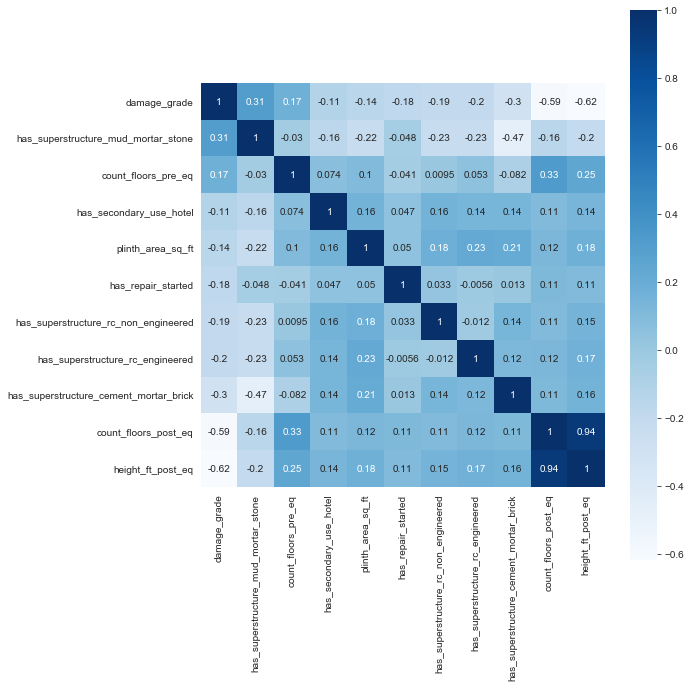

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(zoom_corr[zoom_corr.index],annot=True,square=True,cmap="Blues")
plt.tight_layout()

In [30]:
#Bivariate Analysis:
#we need to know how many building have superstructure and of what type:
has_ss=[]
for feat in train.columns:
    if 'has_superstructure' in feat:
        has_ss.append(feat)

In [31]:
"""plt.figure(figsize=(15,40))
for index,feat in enumerate(has_ss,1):
    plt.subplot(len(has_ss),2,index)
    sns.countplot(x=train[train[feat]==1][feat],hue=train[train[feat]==1]['damage_grade'],palette="Blues_d")
    plt.xticks([])
plt.tight_layout()
"""
#we noticed that buildings which have cement as structure material proves to be strond and less prone to damage.

'plt.figure(figsize=(15,40))\nfor index,feat in enumerate(has_ss,1):\n    plt.subplot(len(has_ss),2,index)\n    sns.countplot(x=train[train[feat]==1][feat],hue=train[train[feat]==1][\'damage_grade\'],palette="Blues_d")\n    plt.xticks([])\nplt.tight_layout()\n'

In [32]:
#we will classify variable between category and continious:
cat = [c for c in train if train[c].dtypes=='object']
cat.remove('building_id')
print('Categorical Feature :\n',cat)
#only land_surface_condition is ordinal rest all are categorical:

Categorical Feature :
 ['area_assesed', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'legal_ownership_status']


In [33]:
num = [c for c in train if (train[c].dtypes!='object' and train[c].nunique()>5)]
num_cont = [c for c in num if (train[c].nunique()>11 and 'id' not in c)]
num_disc = [c for c in num if ('count' in c)]
print('Numerical Continuous features :',num_cont)
print('Numerical Discrete features :',num_disc)

Numerical Continuous features : ['age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq']
Numerical Discrete features : ['count_floors_pre_eq', 'count_floors_post_eq', 'count_families']


In [34]:
def fix_post_floors(dataset):
    pref=dataset['count_floors_pre_eq']
    preh=dataset['height_ft_pre_eq']
    posth=dataset['height_ft_post_eq']
    dataset.loc[(pref==9)&(preh<70),'count_floors_pre_eq']=dataset.loc[(pref==9)&(preh<70)]['height_ft_pre_eq']//7    
    dataset.loc[preh==posth,'count_floors_post_eq']=dataset.loc[preh==posth]['count_floors_pre_eq']

    
def fill_wrong_height(dataset,floor,min_height,max_height):
    preh=dataset['height_ft_pre_eq']
    posth=dataset['height_ft_post_eq']
    pref=dataset['count_floors_pre_eq']
    postf=dataset['count_floors_post_eq']
    pre_median = dataset.loc[pref==floor,'height_ft_pre_eq'].median()
    dataset.loc[(pref==floor) & ((preh>max_height)|(preh<min_height)),'height_ft_pre_eq']=pre_median
    post_median = dataset.loc[postf==floor,'height_ft_post_eq'].median()
    dataset.loc[(postf==floor) & ((posth>max_height)|(posth<min_height)),'height_ft_post_eq']=post_median

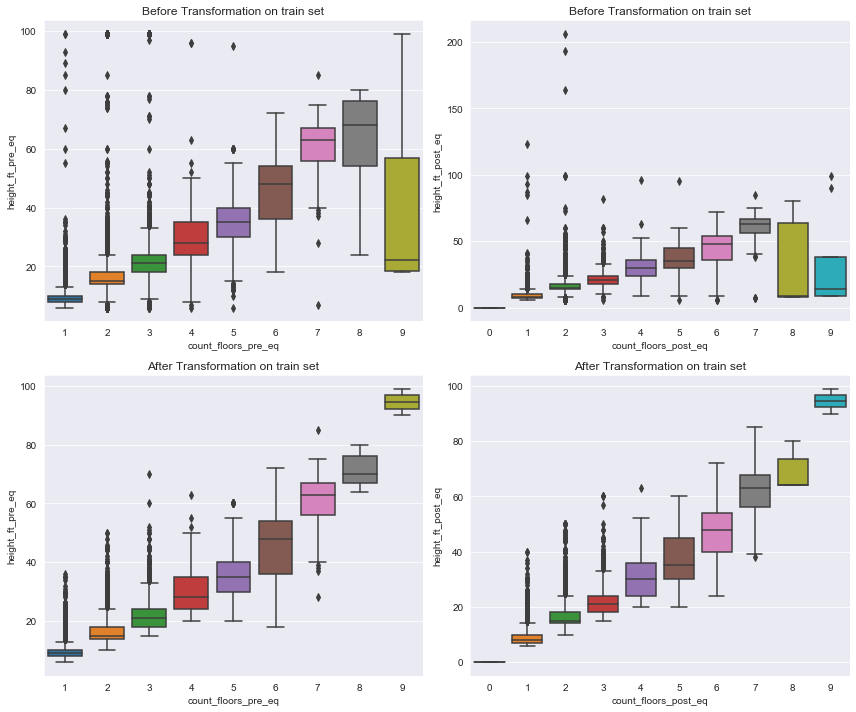

In [35]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.boxplot(x=train['count_floors_pre_eq'],y=train['height_ft_pre_eq'])
plt.title("Before Transformation on train set")
plt.subplot(222)
sns.boxplot(x=train['count_floors_post_eq'],y=train['height_ft_post_eq'])
plt.title("Before Transformation on train set")

fix_post_floors(train)
fill_wrong_height(train,1,6,40)
fill_wrong_height(train,2,10,50)
fill_wrong_height(train,3,15,70)
fill_wrong_height(train,4,20,80)
fill_wrong_height(train,5,20,80)
fill_wrong_height(train,7,20,100)
fill_wrong_height(train,8,30,100)
fill_wrong_height(train,9,40,100)


plt.subplot(223)
sns.boxplot(x=train['count_floors_pre_eq'],y=train['height_ft_pre_eq'])
plt.title("After Transformation on train set")
plt.subplot(224)
sns.boxplot(x=train['count_floors_post_eq'],y=train['height_ft_post_eq'])
plt.title("After Transformation on train set")
plt.tight_layout()

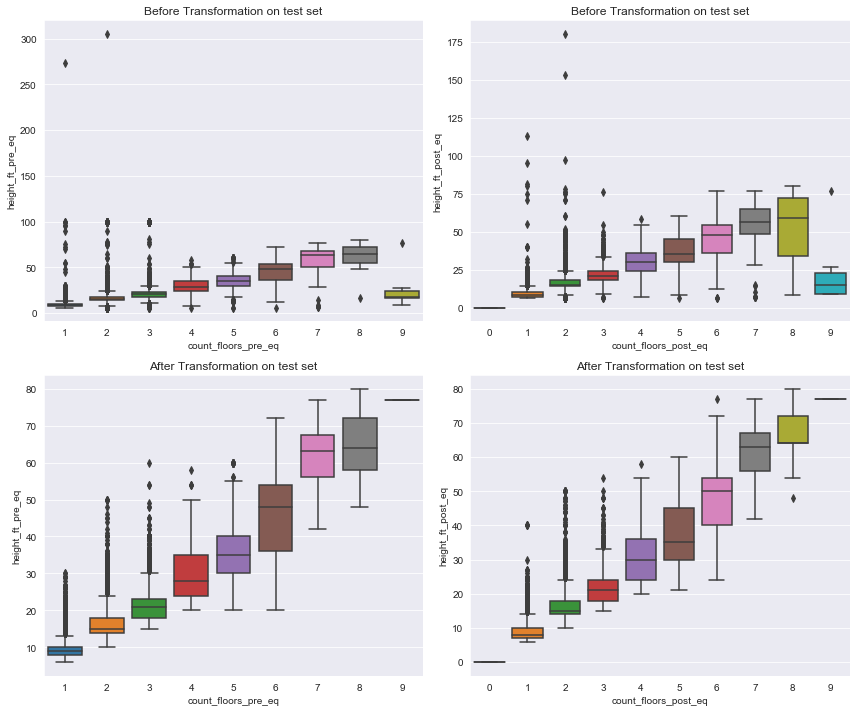

In [36]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.boxplot(x=test['count_floors_pre_eq'],y=test['height_ft_pre_eq'])
plt.title("Before Transformation on test set")
plt.subplot(222)
sns.boxplot(x=test['count_floors_post_eq'],y=test['height_ft_post_eq'])
plt.title("Before Transformation on test set")

fix_post_floors(test)
fill_wrong_height(test,1,6,40)
fill_wrong_height(test,2,10,50)
fill_wrong_height(test,3,15,70)
fill_wrong_height(test,4,20,80)
fill_wrong_height(test,4,20,80)
fill_wrong_height(test,5,20,80)
fill_wrong_height(test,6,20,80)
fill_wrong_height(test,7,35,100)
fill_wrong_height(test,8,30,80)
fill_wrong_height(test,9,40,100)


plt.subplot(223)
sns.boxplot(x=test['count_floors_pre_eq'],y=test['height_ft_pre_eq'])
plt.title("After Transformation on test set")
plt.subplot(224)
sns.boxplot(x=test['count_floors_post_eq'],y=test['height_ft_post_eq'])
plt.title("After Transformation on test set")
plt.tight_layout()

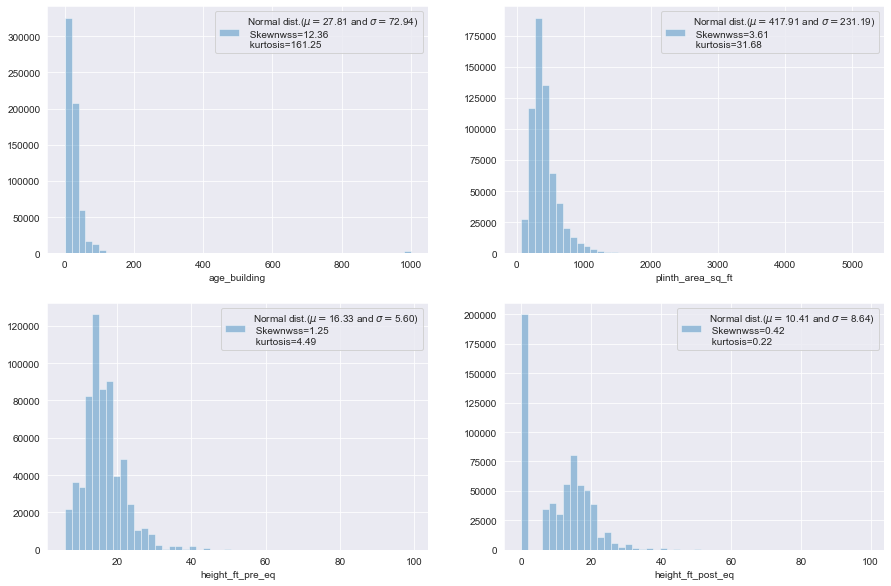

In [37]:
from scipy.stats import norm
plt.figure(figsize=(15,10))
for index,feat in enumerate(num_cont,1):
    plt.subplot(2,2,index)
    skewness = train[feat].skew()
    kurtosis = train[feat].kurt()
    (mu,sigma) = norm.fit(train[feat])
    sns.distplot(train[feat],kde=False)
    plt.legend(["Normal dist.($\mu=${:.2f} and $\sigma=${:.2f}) \n Skewnwss={:.2f} \n kurtosis={:.2f} ".format(mu,sigma,skewness,kurtosis)],loc='best')


In [38]:
for feat in has_ss:
    med = train.loc[train[feat]==1,'age_building'].median()
    train.loc[(train[feat]==1)&(train['age_building']>200),'age_building']=med
train.loc[train['age_building']>200,'age_building']=train['age_building'].median()

In [39]:
for feat in has_ss:
    med = test.loc[test[feat]==1,'age_building'].median()
    test.loc[(test[feat]==1)&(test['age_building']>200),'age_building']=med
test.loc[test['age_building']>200,'age_building']=test['age_building'].median()

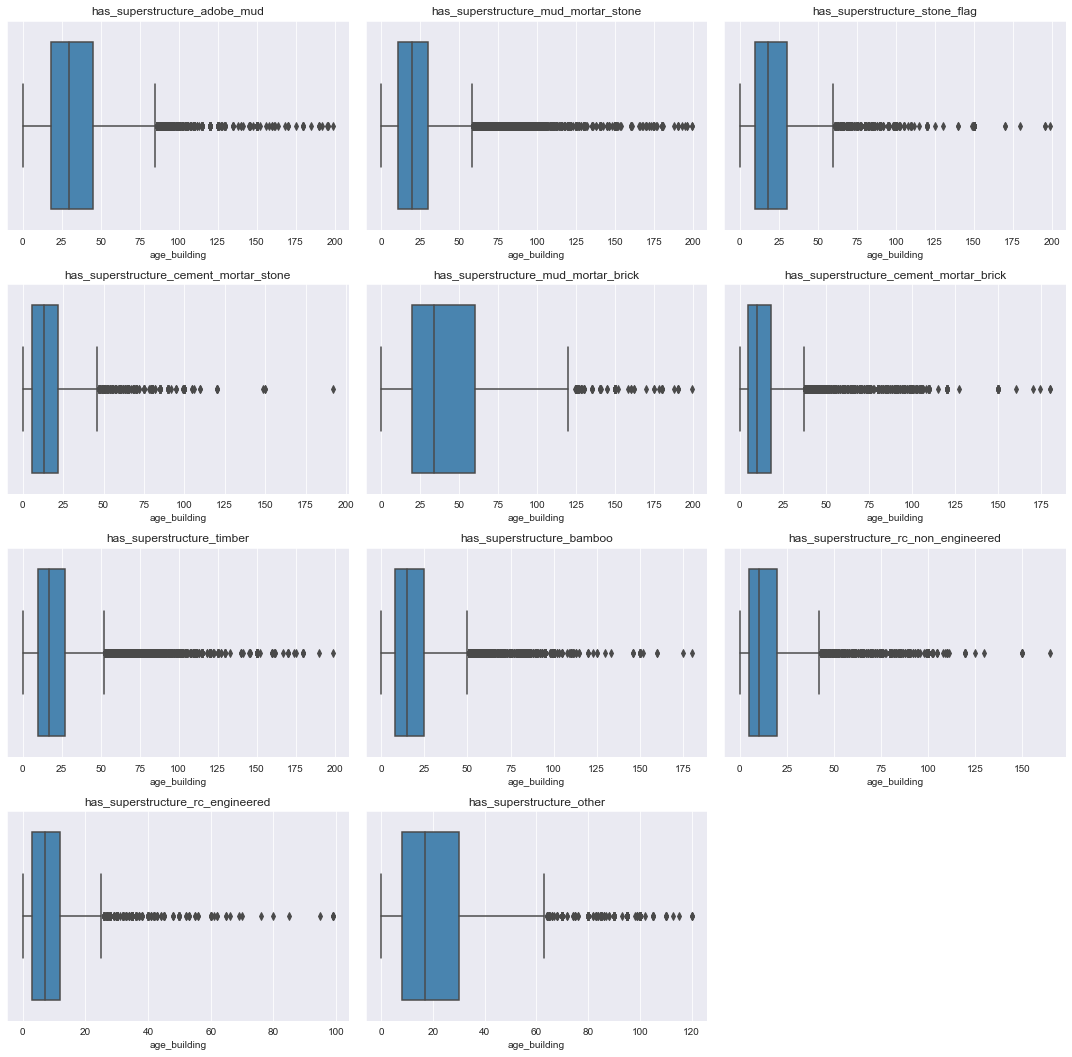

In [40]:
plt.figure(figsize=(15,40))
for index,feat in enumerate(has_ss,1):
    plt.subplot(len(has_ss),3,index)
    sns.boxplot(x=train.loc[(train[feat]==1)&(train['age_building']<200),'age_building'],palette="Blues_d")
    plt.title(feat)
plt.tight_layout()
#we have managed to transform age section 

In [41]:
#changing structure: 
from scipy.stats import chi2_contingency,chi2

#defining func which will return list of independent features:
def chi_square(cat):
    ind_feat=[];variable=[];deg_of_free=[];statistic=[];crit=[];p_value=[];alf=[];conclusion_stats=[];conclusion_p=[]
    for feat in cat:
        #print(feat)
        table=pd.crosstab(train['damage_grade'],train[feat])
        stats, p, dof, expected = chi2_contingency(table)
        #print(dof)
        #import statistics:
        prob = 0.95
        critical = chi2.ppf(prob,dof)
        #print("Probablity={:.3f} ,Staistic={:.3f} ,Critical={:.3f}".format(prob,stats,critical))
        if abs(stats)>critical:
            verdict_stats = "Dependent (Reject H0)"
        else:
            verdict_stats = "Independent (Fail to Reject H0)"
        #import p value:
        alpha=1.0-prob
        #print("alpha={:.3f} ,p-value={:.3f}".format(alpha,p))
        if p<alpha:
            verdict_p="Dependent (Reject H0)"
        else:
            verdict_p="Independent (Fail to Reject H0)"
            ind_feat.append(feat) #adding feature in list if independent
        
        variable.append(feat)
        deg_of_free.append(dof)
        statistic.append('{:.3f}'.format(stats))
        crit.append('{:.3f}'.format(critical))
        p_value.append('{:.3f}'.format(p))
        alf.append('{:.3f}'.format(alpha))
        conclusion_stats.append(verdict_stats)
        conclusion_p.append(verdict_p)
    d={'Variable':variable,'Degree of Freedom':deg_of_free,'Statistic':statistic,'Critical':crit,'Conclusion_stats':conclusion_stats,'p_value':p_value,'Alpha':alf,'Conclusion_p':conclusion_p}
    result=pd.DataFrame(data=d)
    result.set_index("Variable")
    return  result ,ind_feat

In [42]:
res_table ,cat_ind_feat=chi_square(cat)
#turn out that all the categorical variable are important to us

In [43]:
print('ist of Independent features : ',cat_ind_feat)
res_table

ist of Independent features :  []


,Variable,Degree of Freedom,Statistic,Critical,Conclusion_stats,p_value,Alpha,Conclusion_p
0,area_assesed,16,429576.136,26.296,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
1,land_surface_condition,8,1408.392,15.507,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
2,foundation_type,16,138103.743,26.296,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
3,roof_type,8,85099.545,15.507,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
4,ground_floor_type,16,107177.045,26.296,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
5,other_floor_type,12,93978.074,21.026,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
6,position,12,5026.896,21.026,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
7,plan_configuration,36,4672.139,50.998,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
8,condition_post_eq,28,1112041.847,41.337,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
9,legal_ownership_status,12,8113.932,21.026,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)


In [44]:
#now we have to do the same for binary variables too:
bin_var = [feat for feat in train if train[feat].nunique()==2]

In [45]:
bin_res_table , bin_ind_feat=chi_square(bin_var)
print(bin_ind_feat)
bin_res_table

['has_secondary_use_use_police']


,Variable,Degree of Freedom,Statistic,Critical,Conclusion_stats,p_value,Alpha,Conclusion_p
0,has_geotechnical_risk,4,5002.422,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
1,has_geotechnical_risk_fault_crack,4,6414.182,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
2,has_geotechnical_risk_flood,4,641.109,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
3,has_geotechnical_risk_land_settlement,4,2121.550,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
4,has_geotechnical_risk_landslide,4,3088.089,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
5,has_geotechnical_risk_liquefaction,4,281.471,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
6,has_geotechnical_risk_other,4,37.684,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
7,has_geotechnical_risk_rock_fall,4,2658.210,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
8,has_repair_started,4,43759.717,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)
9,has_superstructure_adobe_mud,4,7518.875,9.488,Dependent (Reject H0),0.000,0.050,Dependent (Reject H0)


In [46]:
#we will remove bin_ind_feat:
train.drop(bin_ind_feat,axis=1,inplace=True)
test.drop(bin_ind_feat,axis=1,inplace=True)

In [47]:
#now we will move to Data-Featuring:
for feat in cat:
    print(feat)
    print(train[feat].value_counts()/len(train[feat]))
    print('\n')
#wew have to map ordinal once and make dummies of the nominal once:
#ordinal once are land_surface_condition,

area_assesed
Both                   0.606229
Building removed       0.207905
Exterior               0.156752
Not able to inspect    0.026236
Interior               0.002878
Name: area_assesed, dtype: float64


land_surface_condition
Flat              0.830164
Moderate slope    0.137870
Steep slope       0.031966
Name: land_surface_condition, dtype: float64


foundation_type
Mud mortar-Stone/Brick    0.841331
Bamboo/Timber             0.057590
Cement-Stone/Brick        0.054574
RC                        0.040962
Other                     0.005543
Name: foundation_type, dtype: float64


roof_type
Bamboo/Timber-Light roof    0.701973
Bamboo/Timber-Heavy roof    0.235493
RCC/RB/RBC                  0.062535
Name: roof_type, dtype: float64


ground_floor_type
Mud            0.804121
Brick/Stone    0.095558
RC             0.094446
Timber         0.003902
Other          0.001974
Name: ground_floor_type, dtype: float64


other_floor_type
TImber/Bamboo-Mud    0.632353
Timber-Planck        0.168

In [48]:
#simplified few features :
datasets=[train,test]
drop_list = ['land_surface_condition','legal_ownership_status','position','plan_configuration']
for dataset in datasets:
    dataset['land_is _flat']=(dataset['land_surface_condition']=='Flat')*1 #for land_surface_condition:
    dataset['private_prop']=(dataset['legal_ownership_status']=='Private')*1 #for leagel ownership:
    dataset['rect_shape_prop']=(dataset['plan_configuration']=='Rectangular')*1 #for plan configuration:
    dataset['is_prop_attached']=(dataset['position']!='Not attached')*1 #for property position:
    dataset.drop(drop_list,axis=1,inplace=True)

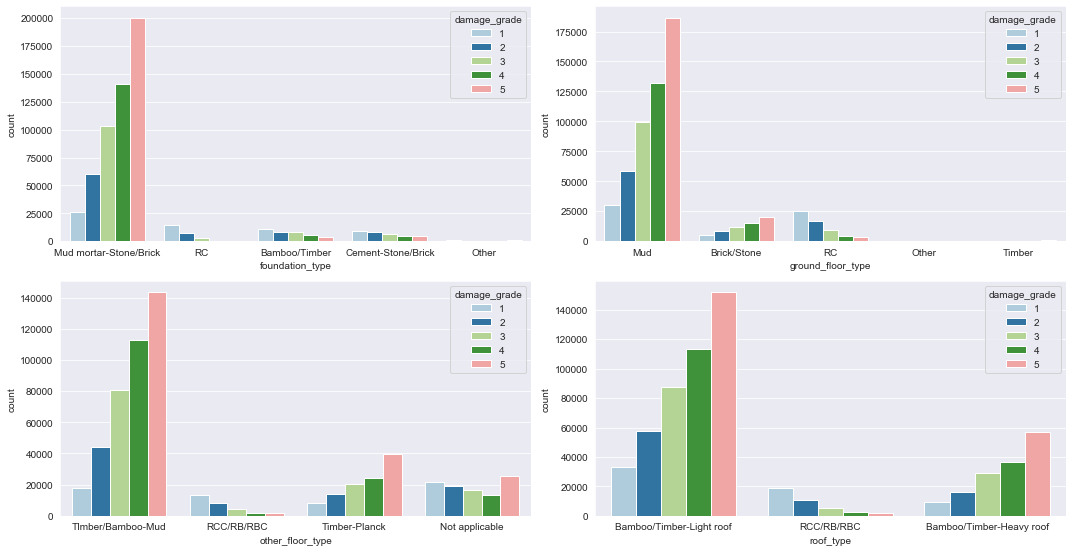

In [49]:
build_mat = ['foundation_type','ground_floor_type','other_floor_type','roof_type']
plt.figure(figsize=(15,15))
for index,feat in enumerate(build_mat,1):
    plt.subplot(len(build_mat),2,index)
    sns.countplot(train[feat],hue=train['damage_grade'],palette="Paired")
plt.tight_layout()

In [50]:
#now transforming numerical continuous data:
for dataset in datasets:
    for feat in num_cont:
        dataset[feat]=np.sqrt(dataset[feat])

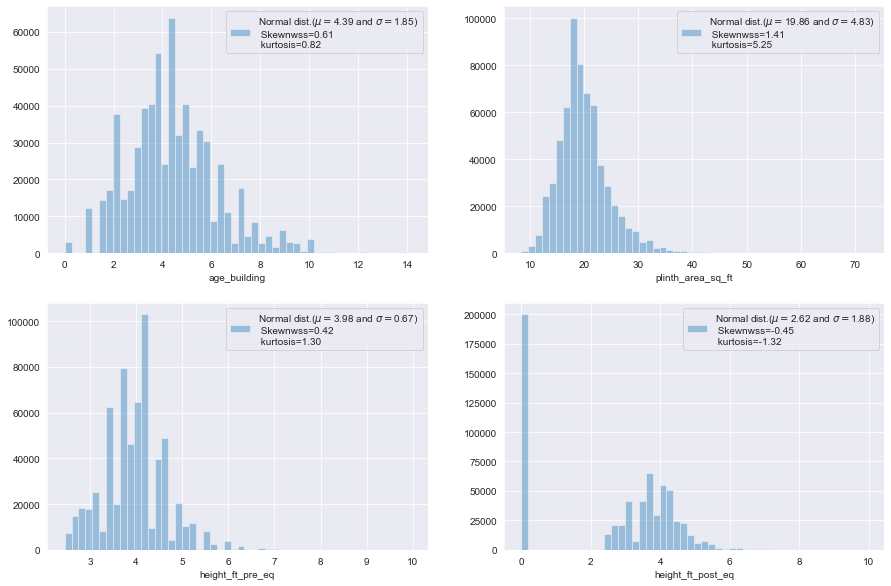

In [51]:
from scipy.stats import norm
plt.figure(figsize=(15,10))
for index,feat in enumerate(num_cont,1):
    plt.subplot(2,2,index)
    skewness = train[feat].skew()
    kurtosis = train[feat].kurt()
    (mu,sigma) = norm.fit(train[feat])
    sns.distplot(train[feat],kde=False)
    plt.legend(["Normal dist.($\mu=${:.2f} and $\sigma=${:.2f}) \n Skewnwss={:.2f} \n kurtosis={:.2f} ".format(mu,sigma,skewness,kurtosis)],loc='best')


In [52]:
#including dataset that corresponds to change pre and post Earthquake:
datasets=[train,test]
flr_high =['count_floors_post_eq','height_ft_post_eq']
for dataset in datasets:
    dataset['count_floor_change']=dataset['count_floors_pre_eq']-dataset['count_floors_post_eq']
    dataset['height_ft_change']=dataset['height_ft_pre_eq']-dataset['height_ft_post_eq']
    dataset.drop(flr_high,axis=1,inplace=True)

In [53]:
for dataset in datasets:
    dataset.drop('building_id',axis=1,inplace=True)

In [54]:
grade_mapping = {4:'Grade 4', 2:'Grade 2', 1:'Grade 1', 5:'Grade 5', 3:'Grade 3'}
train['damage_grade'] = train['damage_grade'].map(grade_mapping)

In [55]:
X=train.drop('damage_grade',axis=1)
y=train['damage_grade']

In [56]:
X=pd.get_dummies(X,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

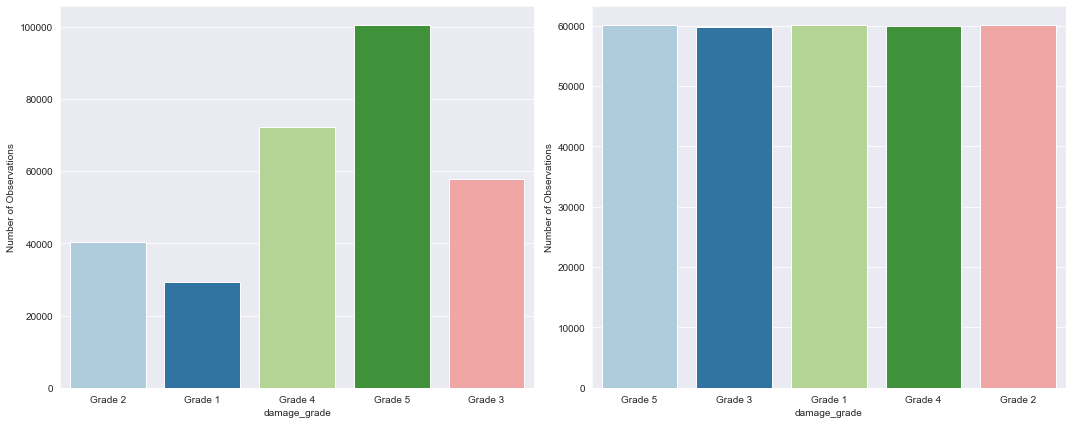

In [58]:
#Smote in X_train,y_train:
from imblearn.over_sampling import SMOTE
import random

smote = SMOTE(random_state=0)
os_data_X,os_data_y = smote.fit_sample(X_train,y_train)
X_train_os = pd.DataFrame(data = os_data_X, columns = X_train.columns)
y_train_os = pd.DataFrame(data = os_data_y, columns = ["damage_grade"])

#making it random and visualising before and after transformation:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(y_train_os['damage_grade'].loc[:300000],palette="Paired")
plt.ylabel("Number of Observations")
no_of_rows_aft_os=len(X_train_os)
index = [i for i in range(no_of_rows_aft_os)]
random.shuffle(index)
X_train_os = X_train_os.set_index([index]).sort_index()
y_train_os = y_train_os.set_index([index]).sort_index()
plt.subplot(122)
sns.countplot(y_train_os['damage_grade'].loc[:300000],palette="Paired")
plt.ylabel("Number of Observations")
plt.tight_layout()

In [62]:
#doing with cross validation(hyper-paramerter tuning):
from sklearn.model_selection import cross_val_score
dtclf=DecisionTreeClassifier(random_state=100)
score=cross_val_score(dtclf,X_train,y_train,cv=5)
print("Accuracy of k fold on train set : ",np.mean(score))

#doing with cross validation(hyper-paramerter tuning):
from sklearn.model_selection import cross_val_score
dtclf=DecisionTreeClassifier(random_state=100)
score=cross_val_score(dtclf,X_train_os,y_train_os,cv=5)
print("Accuracy of k fold on SMOTE train set : ",np.mean(score))

Accuracy of k fold on train set :  0.7097111910025561


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#this is when we dont use any smote feature:
dt=DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred_tree = dt.predict(X_test)
tree_acc = accuracy_score(y_test,y_pred_tree)
print("Accuracy of Decision Tree without SMOTE :",tree_acc)

#fitting a decision tree to model with smote transformation:
dt=DecisionTreeClassifier()
dt = dt.fit(X_train_os,y_train_os['damage_grade'])
y_pred_tree = dt.predict(X_test)
y_pred_tree_series=pd.Series(y_pred_tree)
tree_acc = accuracy_score(y_test,y_pred_tree_series)
print("Accuracy of Decision Tree with SMOTE :",tree_acc)

Accuracy of Decision Tree without SMOTE : 0.7124134037535153
Accuracy of Decision Tree with SMOTE : 0.7110732394514824


Accuracy of Random Forest with SMOTE : 0.7625904215186067


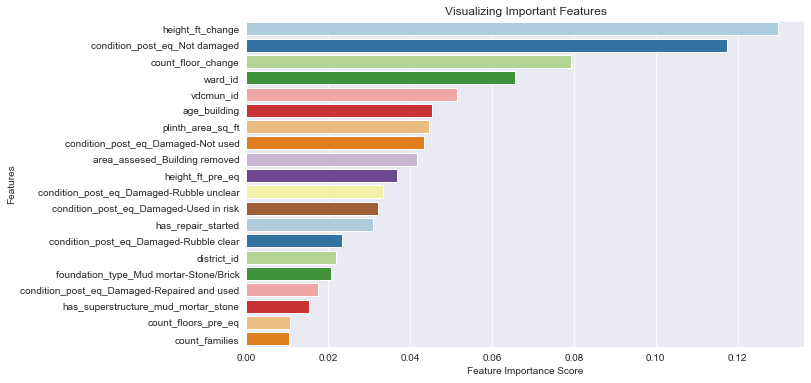

In [60]:
#fitting to random forest model:
rf=RandomForestClassifier(n_estimators=200, min_samples_leaf=2,n_jobs=-1)
rf.fit(X_train_os,y_train_os['damage_grade'])
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test,y_pred_rf)
print("Accuracy of Random Forest with SMOTE :",rf_acc)

#getting important features:
feature_imp = pd.Series(rf.feature_importances_,index=X_train_os.columns).sort_values(ascending=False)

# Creating a bar plot:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20],palette="Paired")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Accuracy of k fold SMOTE train set :  0.7588088524656673
